# Part I - (Prosper Loan Dataset Exploration)
## by (Kwesi Acheampong)

## Introduction
> This is a dataset of 113,937 loans with 81 columns.

 



## Preliminary Wrangling


In [116]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [117]:
#loading data
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18                0.0   
1        0.0920       0.0820    ...               0.00                0.0   
2        0.2750       0.2400    ...             -24.20                0.0   
3        0.0974       0.0874    ...            -108.01                0.0   
4        0.2085       0.1985    ...             -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [118]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [119]:
#summary statistics
df_loan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore      ...        LP_ServiceFees  \
count             84853.000000  84853.000000      ...         113937.000000   
mean                  4.072243      5.950067      ...            -54.725641   
std                   1.673227      2.376501      ...             60.675425   
min                   1.000000      1.000000      ...           -664.870000   
25%                   3.000000      4.000000      ...            -73.180000   
50%                   4.000000      6.000000      ...            -34.440000   
75%                   5.000000      8.000000      ...            -13.920000   
max                   7.000000     11.000000      ...             32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     

In [120]:
#duplicates
d=df_loan.duplicated()
d.sum()

0

In [121]:
#columns needed
t_col =  ['Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)','DelinquenciesLast7Years','ProsperScore', 'StatedMonthlyIncome', 'TotalProsperLoans', 'ProsperRating (numeric)','LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors','EmploymentStatus','IsBorrowerHomeowner','DebtToIncomeRatio']

In [122]:
#now get data based on columns to use
new_df=df_loan[t_col]
new_df.head()

Term LoanStatus  BorrowerRate  BorrowerAPR ProsperRating (Alpha)  \
0    36  Completed        0.1580      0.16516                   NaN   
1    36    Current        0.0920      0.12016                     A   
2    36  Completed        0.2750      0.28269                   NaN   
3    36    Current        0.0974      0.12528                     A   
4    36    Current        0.2085      0.24614                     D   

   ListingCategory (numeric)  DelinquenciesLast7Years  ProsperScore  \
0                          0                      4.0           NaN   
1                          2                      0.0           7.0   
2                          0                      0.0           NaN   
3                         16                     14.0           9.0   
4                          2                      0.0           4.0   

   StatedMonthlyIncome  TotalProsperLoans  ProsperRating (numeric)  \
0          3083.333333                NaN                      NaN   
1          6125.000000                NaN                      6.0   
2          2083.333333                NaN                      NaN   
3          2875.000000                NaN                      6.0   
4          9583.333333                1.0                      3.0   

   LoanOriginalAmount  LoanOriginationDate  Recommendations  Investors  \
0                9425  2007-09-12 00:00:00                0        258   
1               10000  2014-03-03 00:00:00                0          1   
2                3001  2007-01-17 00:00:00                0         41   
3               10000  2012-11-01 00:00:00                0        158   
4               15000  2013-09-20 00:00:00                0         20   

  EmploymentStatus  IsBorrowerHomeowner  DebtToIncomeRatio  
0    Self-employed                 True               0.17  
1         Employed                False               0.18  
2    Not available                False               0.06  
3         Employed                 True               0.15  
4         Employed                 True               0.26

In [123]:
#checking size
new_df.shape

(113937, 18)

In [124]:
#lets drop missing values
new_df.dropna(subset=['ProsperRating (Alpha)'],inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [125]:
new_df.shape

(84853, 18)

In [126]:
#change LoanOriginationDate type to datetime
new_df.LoanOriginationDate = pd.to_datetime(new_df.LoanOriginationDate)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 18 columns):
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
BorrowerAPR                  84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
DelinquenciesLast7Years      84853 non-null float64
ProsperScore                 84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            19797 non-null float64
ProsperRating (numeric)      84853 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null datetime64[ns]
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
EmploymentStatus             84853 non-null object
IsBorrowerHomeowner          84853 non-null bool
DebtToIncomeRat

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [127]:
#filling these two columns of nan with 0
tp=new_df.TotalProsperLoans
new_df.TotalProsperLoans = tp.fillna(0)
diro=new_df.DebtToIncomeRatio 
new_df.DebtToIncomeRatio  = diro.fillna(0)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [128]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 18 columns):
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
BorrowerAPR                  84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
DelinquenciesLast7Years      84853 non-null float64
ProsperScore                 84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            84853 non-null float64
ProsperRating (numeric)      84853 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null datetime64[ns]
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
EmploymentStatus             84853 non-null object
IsBorrowerHomeowner          84853 non-null bool
DebtToIncomeRat

### What is the structure of your dataset?

> After doing some cleaning my dataset has 84853 observations with 18 columns. The columns of interest are as follows:'Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)','DelinquenciesLast7Years','ProsperScore', 'StatedMonthlyIncome', 'TotalProsperLoans', 'ProsperRating (numeric)','LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors','EmploymentStatus','IsBorrowerHomeowner', and'DebtToIncomeRatio'.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are:

1. to find if there are interactions between  Stated Monthly Income,  Loan Original Amount, Prosper Score, and other variables.
2. to find the attributes the predict  Borrower APR the most.
3. to find the attributes that are associated with Prosper Credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help me support my investigations are:

1. I am sure there will be strong interaction between Prosper score and Borrower APR
2. For predicting Borrower APR, I think Loan Original Amount and Stated Monthly Income affects the prediction.
3. I also think a borrower  will affect Prosper credit rating.

## Univariate Exploration

> In this section, I investigate distributions of individual variables.


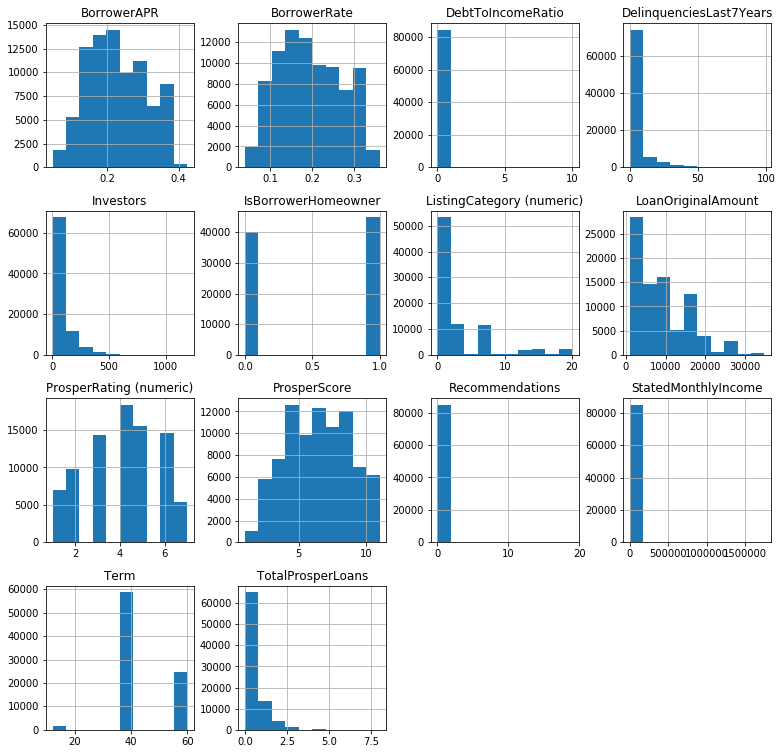

In [129]:
#setting the of the color
bc = sn.color_palette()[0]
#histograms of each variable
s=(13,13)
new_df.hist(figsize=s);

### Employment Status

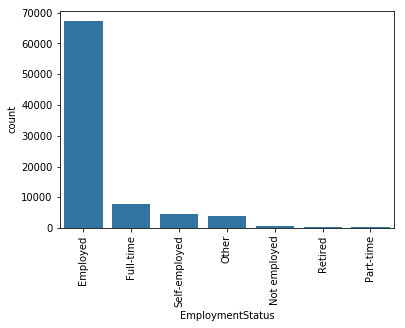

In [130]:
#rotation number
r=90

#ordering
so =new_df.EmploymentStatus.value_counts().index
plt.xticks(rotation=r)
sn.countplot(data = new_df, x = 'EmploymentStatus', color = bc,order = so);

### Observations:
From the dataset , most of the loans taken are from employed people, followed by full-time people and the self-employed and so on to the lowest as part-time people.

### Loan Status

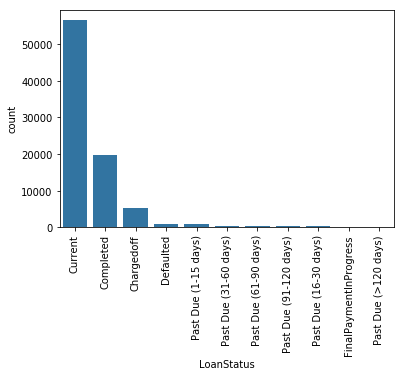

In [131]:
#rotation number
r=90

#ordering
so =new_df.LoanStatus.value_counts().index
plt.xticks(rotation=r)
sn.countplot(data = new_df, x = 'LoanStatus', color = bc,order = so);

### Observation:
From the dataset, most of the loans taken are current and loans that are past due are put in segments.

### Term

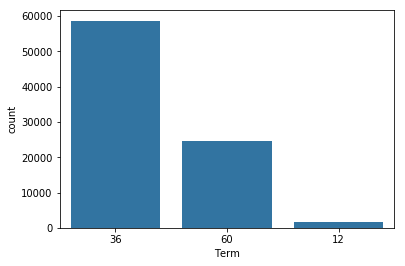

In [132]:
so =new_df.Term.value_counts().index
sn.countplot(data = new_df, x = 'Term', color = bc,order = so);

### Observation:
From the dataset, most common length of loans is 36 months, followed by 60 months and the 12 months

### ProsperRating (numeric)

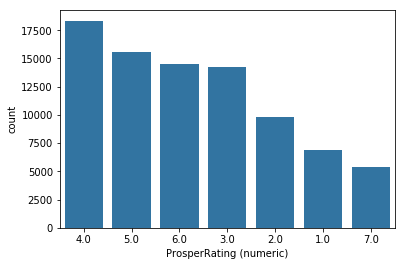

In [133]:
sp =new_df['ProsperRating (numeric)'].value_counts().index
sn.countplot(data = new_df, x = 'ProsperRating (numeric)', color = bc,order = sp);

### Observation:
From the dataset, the rating with the highest count of borrowers is 4.0  and the rating with the lowest count of borrowers is 7.0.

### Borrower APR

Text(0.5,0,'Borrower APR')

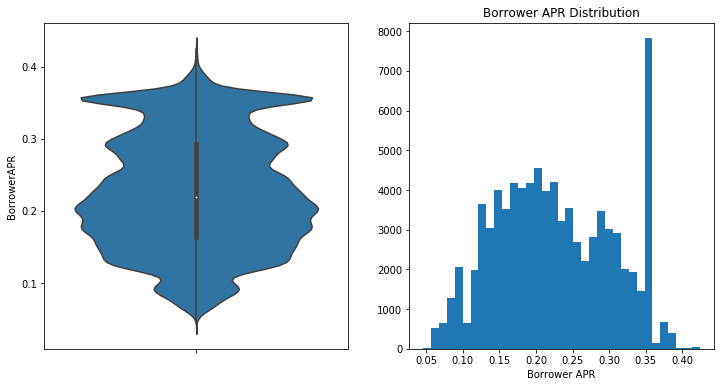

In [134]:
s=[12, 6]
b=35
plt.figure(figsize = s)

#for violing plot
plt.subplot(1,2,1)
sn.violinplot(data = new_df, y = 'BorrowerAPR', color = bc);

#for histogram of BorrowerAPR
plt.subplot(1,2,2)
plt.hist(data=new_df, x='BorrowerAPR', bins=b);
t='Borrower APR Distribution'
plt.title(t);
xt='Borrower APR'
plt.xlabel(xt)


### Observation:
From the dataset, the distribution shows 2 peaks of the data ,the first peak has a mode around 0.20 or 20% and the second peak is around 35% or 0.35. 

### Prosper Score

Text(0.5,0,'ProsperScore')

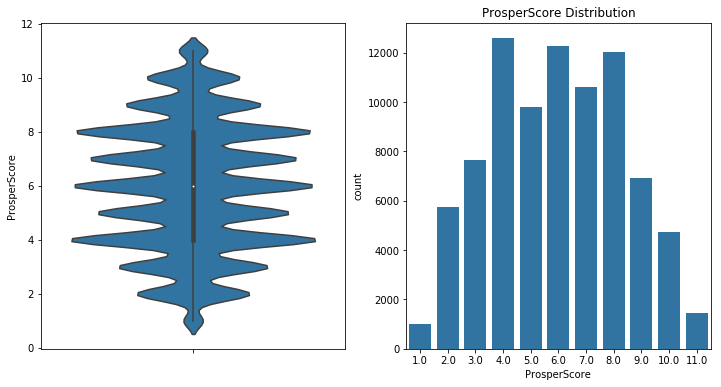

In [135]:
s=[12, 6]
b=35
plt.figure(figsize = s)

#for violing plot
plt.subplot(1,2,1)
sn.violinplot(data = new_df, y = 'ProsperScore', color = bc);

#for histogram of prosperscore
plt.subplot(1,2,2)
sn.countplot(data = new_df, x = 'ProsperScore', color= bc);
t='ProsperScore Distribution'
plt.title(t);
xt='ProsperScore'
plt.xlabel(xt)

### Observation:
from the dataset, has the mean score at 6.0 and has higher peaks at 4.0,6.0 and 8.0.

### ListingCategory (numeric)

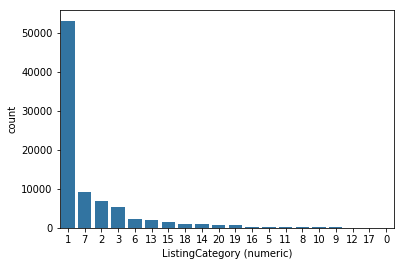

In [136]:
soo =new_df['ListingCategory (numeric)']
so=soo.value_counts().index
sn.countplot(data = new_df, x ='ListingCategory (numeric)' , color = bc,order = so);
s=[7, 4]
plt.figure(figsize = s)

### Observations:
From the dataset, 1(Debt Consolidation) is the highest is the reason why borrowers get loans, follower by 7(other),then 2(Home Improvement) and so on.


### IsHomeOwner

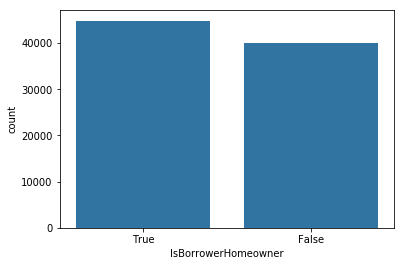

In [137]:
soo =new_df['IsBorrowerHomeowner']
so=soo.value_counts().index
sn.countplot(data = new_df, x ='IsBorrowerHomeowner' , color = bc,order = so);
s=[7, 4]
plt.figure(figsize = s)

### Observation:
From dataset, most people that borrower money are homeowners

### StateMonthlyIncome

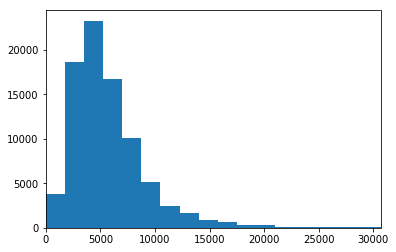

In [138]:
y=3
bs=1000
istd = new_df.StatedMonthlyIncome.std()
iavg = new_df.StatedMonthlyIncome.mean()
b= iavg + istd * y
len(new_df[new_df['StatedMonthlyIncome'] >= b])

plt.hist(data=new_df, x='StatedMonthlyIncome', bins=bs);
plt.xlim(0,b);

### Observation:
From dataset , a state monthly income of 5000 has the highest borrowing count and the distribution is skewed to the right.

### LoanOriginalAmount

Text(0.5,0,'LoanOriginalAmount')

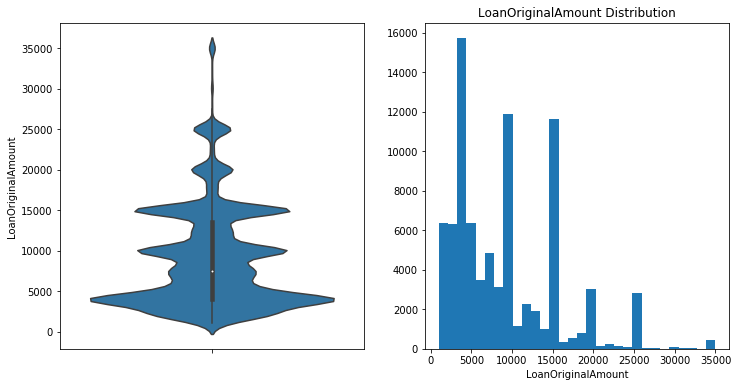

In [139]:
s=[12, 6]
b=30
plt.figure(figsize = s)

#for violing plot
plt.subplot(1,2,1)
sn.violinplot(data = new_df, y = 'LoanOriginalAmount', color = bc);

#for histogram of 'LoanOriginalAmount'
plt.subplot(1,2,2)
plt.hist(data=new_df, x='LoanOriginalAmount', bins=b);
t='LoanOriginalAmount Distribution'
plt.title(t);
xt='LoanOriginalAmount'
plt.xlabel(xt)

### Observation:
From the dataset ,it can be seen that high number of the borrowers get loans that is lesser than 5000.

### DelinquenciesInLast7Years

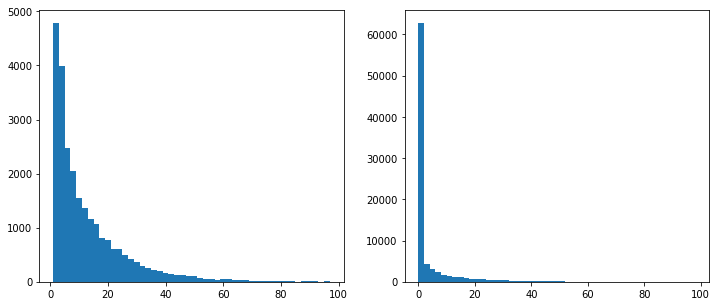

In [140]:
s=[12, 5]
plt.figure(figsize = s) 

plt.subplot(1, 2, 1);
m1=new_df.DelinquenciesLast7Years.max()
b1 = np.arange(1, m1, 2)
plt.hist(data = new_df, x = 'DelinquenciesLast7Years', bins = b1);

plt.subplot(1, 2, 2);
m2=new_df.DelinquenciesLast7Years.max()
b2 = np.arange(0, m2, 2)
plt.hist(data = new_df, x = 'DelinquenciesLast7Years', bins = b2);


### Observations:
From the dataset, it is seen that most of the people that borrower money have no deliquencies in the last seven years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. The Prosper Score dataset has lots of mode making it multimodal. These 3 peaks are a score of  4, 8 and 6 with a mean score at 6.
2. The Borrower APR dataset hase 2 modes making it bimodal. These two peaks are  around 0.2 or 20% and around 0.35 or 35%.
3. The monthly stated income has lots of outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The were lots of outliers in the Monthly State Income. It showed high monthly earners were borrowers which does not makes sense to me. It could be there were entry errors or reporting errors.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data.

Because the data is huge , I will take just a sample of 1200 and pairgrid plot it

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


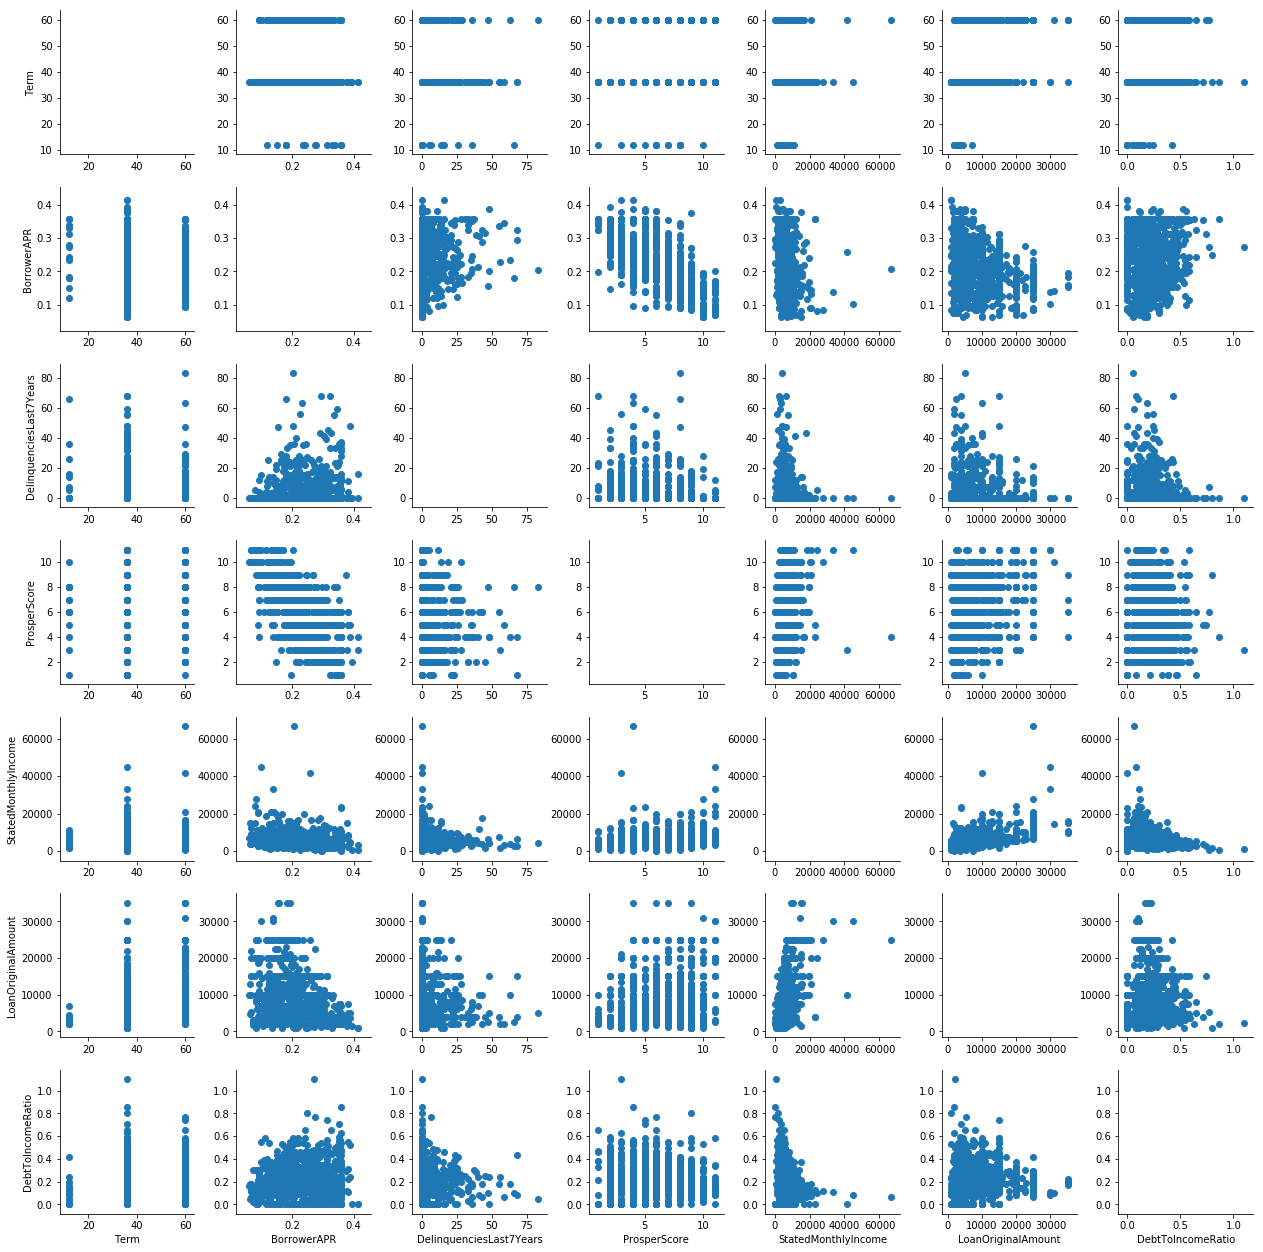

In [141]:
#targeted columns
tc=['Term', 'BorrowerAPR','DelinquenciesLast7Years','ProsperScore', 'StatedMonthlyIncome','LoanOriginalAmount', 'DebtToIncomeRatio']
l=1200
s=new_df.shape[0]
sp = np.random.choice(s, l, replace = False)
sp_df = new_df.loc[sp,:]

pg = sn.PairGrid(data = sp_df, vars = tc);
ps=plt.scatter
pg.map_offdiag(ps);

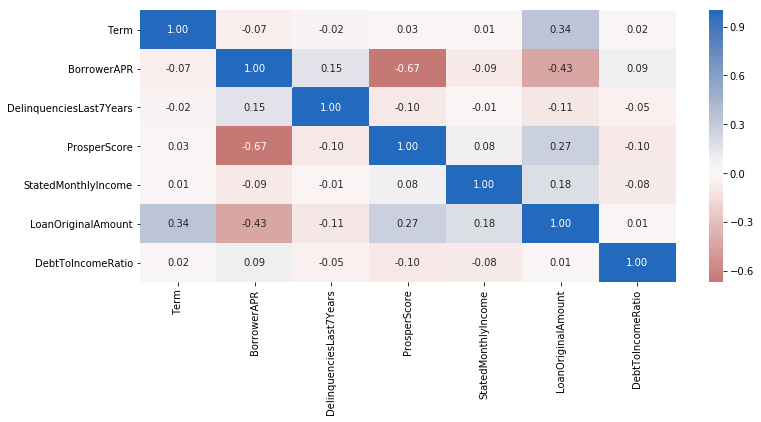

In [142]:
s=[12, 5]
plt.figure(figsize = s);
t='.2f'
c='vlag_r'
sc=0
sn.heatmap(new_df[tc].corr(), annot = True, fmt = t, cmap = c, center = sc);

### Observation:
From the dataset:
1. I realized there is moderate negative correlation existing between Borrower APR and Loan Amount. 
2.  There is strong negative relationship between Prosper Score and Borrower APR .
3. A weak correlation existing between Borrower APR and Delinquencies in Last 7 Years.
4. A weak correlation existing between Borrower APR and Debt to Income Ratio. 
5. A weak correlation existing between Borrower APR and Stated Monthly Income.
6. A weak correlation existing between Prosper Score and Loan Amount.
7. A weak correlation existing between Prosper Score and Delinquencies in Last 7 Years.
8. A weak correlation existing between Prosper Score and Debt to Income Ratio.
9. A weak correlation existing between Prosper Score and Stated Monthly Income.


### Categories against Numeric features

In [143]:
#categorical features against numeric features
cv= ['Term','IsBorrowerHomeowner','EmploymentStatus','ProsperScore']

In [144]:
l=2000
s=new_df.shape[0]
sp = np.random.choice(s, l, replace = False)
sp_df = new_df.loc[sp,:]



/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [145]:
#making boxplot for each
def boxgrid(x, y, **kwargs):
    r=0
    dc= sn.color_palette()[r]
    sn.boxplot(x, y, color = dc);
    

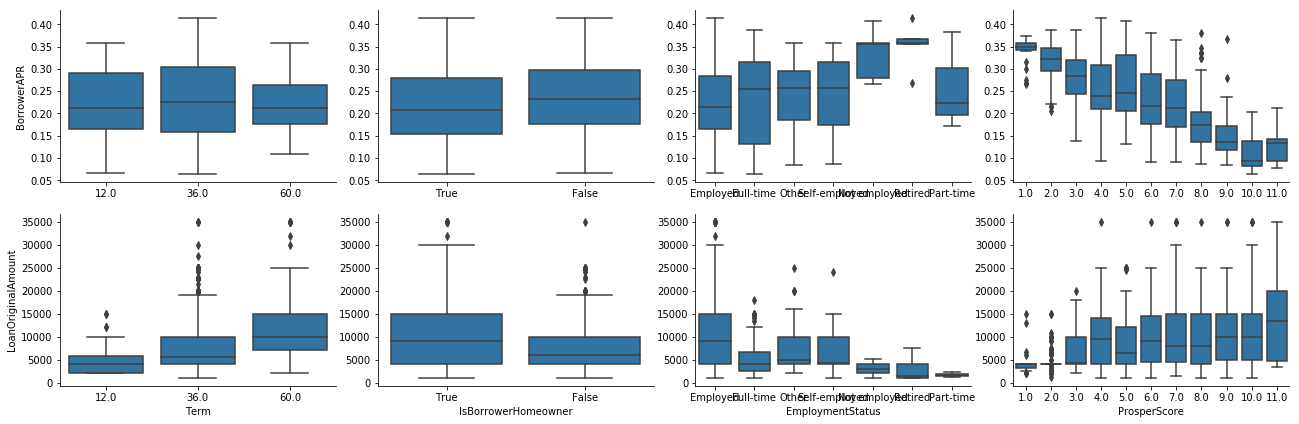

In [146]:
st=[16, 10]
plt.figure(figsize = st);
ci=['BorrowerAPR', 'LoanOriginalAmount']
pg = sn.PairGrid(data = sp_df, y_vars = ci,
                x_vars = cv, size = 3, aspect = 1.5);
pg.map(boxgrid);

### Borrower APR with other variables

Text(0.5,1,'BorrowerAPR vs. Loan Original Amount')

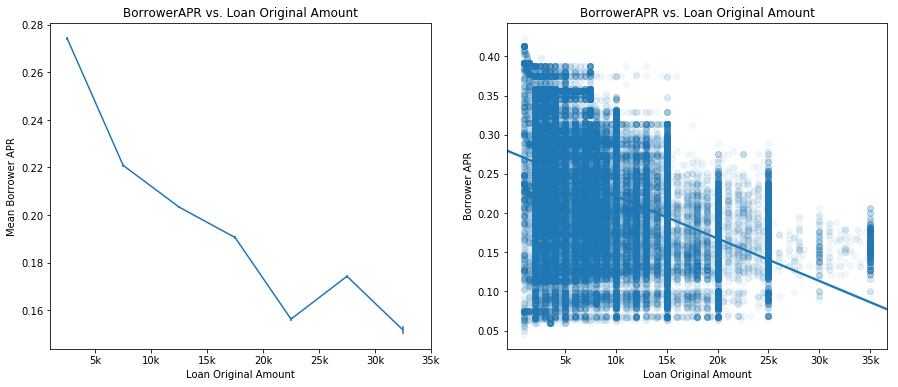

In [147]:
#Borrower APR with Loan Original Amount
hs=(15,6)
plt.figure(figsize =hs )

plt.subplot(1,2,1)
r=0
st=new_df.LoanOriginalAmount.max()
bxe = np.arange(r, st+5000, 5000)
bxc = (bxe + 2500)[:-1]

# each bin stats
loa=new_df.LoanOriginalAmount
bap=new_df.BorrowerAPR
dxb = pd.cut(loa, bxe, right = False, include_lowest = True)
avgyy = bap.groupby(dxb)
avgy=avgyy.mean()
yss = bap.groupby(dxb)
ys=yss.sem()

# plotting data being summaized
plt.errorbar(x = bxc, y = avgy, yerr = ys);
xt='Loan Original Amount'
plt.xlabel(xt);
yt='Mean Borrower APR'
plt.ylabel(yt);
tt='BorrowerAPR vs. Loan Original Amount'
plt.title(tt)
xk=[5000, 10000, 15000, 20000, 25000, 30000, 35000]
xv=['5k', '10k', '15k', '20k', '25k', '30k', '35k']
plt.xticks(xk,xv );



plt.subplot(1,2,2)
ux='LoanOriginalAmount'
uy='BorrowerAPR'
k= {'alpha' : 1/20}
sn.regplot(data =new_df, x = ux, y = uy, scatter_kws =k);
plt.xticks(xk, xv)
plt.xlabel(xt);
gf='Borrower APR'
plt.ylabel(gf);
plt.title(tt)



### Observations:
From the dataset and figure above:
1. It is seen that there is a negative correlation between between Borrower APR and Loan Origional Amount. This might be the cause of high loans being given to borrowers with high risk scores.

Text(0.5,0,'ProsperScore')

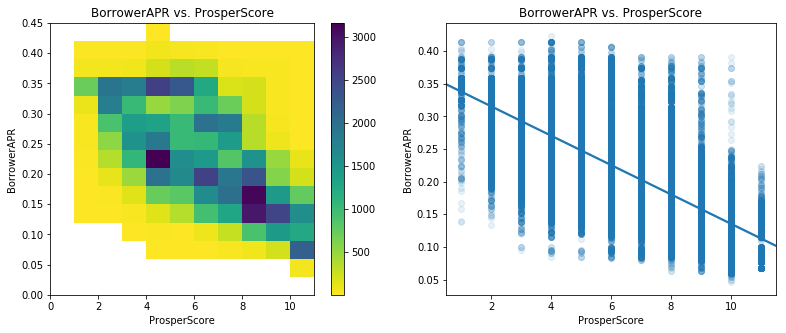

In [148]:
#Borrower APR with Prosper Score
r=[13, 5]
plt.figure(figsize = r) 

plt.subplot(1, 2, 1)
st=0
enx=new_df.ProsperScore.max()
eny=new_df.BorrowerAPR.max()
ix='ProsperScore'
iy='BorrowerAPR'
bx = np.arange(st, enx+1, 1)
by = np.arange(st, eny+0.03, 0.03)
bxy=[bx, by]
plt.hist2d(data =new_df, x = ix, y = iy, bins =bxy , cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
t='BorrowerAPR vs. ProsperScore'
plt.title(t)
y='BorrowerAPR'
plt.ylabel(y)
x='ProsperScore'
plt.xlabel(x);



plt.subplot(1, 2, 2)
k={'alpha' : 1/10}
sn.regplot(data =new_df, x = ix, y = iy, scatter_kws = k);
plt.title('BorrowerAPR vs. ProsperScore')
plt.ylabel(y)
plt.xlabel(x)

### Observations:
From dataset and figure above:
1. It is shown that a negative correlation exist between Borrower APR and Prosper Score. It indicates that borrowers with lower prosper score pay more for the loan taken.

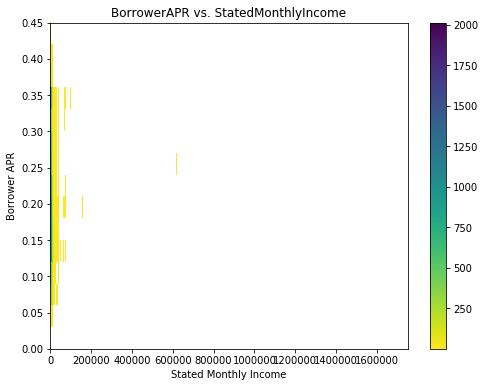

In [149]:
#Borrower APR with State Monthly Income
s=[8, 6]
plt.figure(figsize =s ) 
r=0
enx=new_df.StatedMonthlyIncome.max()
eny=new_df.BorrowerAPR.max()
q=1000
p=0.03
bx = np.arange(r,enx+q, q)
by = np.arange(r, eny+p, p)
ux='StatedMonthlyIncome'
uy='BorrowerAPR'
b=[bx, by]
e= 0.5
plt.hist2d(data = new_df, x =ux , y =uy , bins =b ,cmap = 'viridis_r', cmin =e)
plt.colorbar()
tt='BorrowerAPR vs. StatedMonthlyIncome'
plt.title(tt)
yt='Borrower APR'
plt.ylabel(yt)
xt='Stated Monthly Income'
plt.xlabel(xt);

Because state monthly income is huge and has a lot of outliers, i will restrict my income to the origional loan amount which is 35000 dollars.


In [150]:
con=new_df.StatedMonthlyIncome
new_df = new_df[ con< 35000]

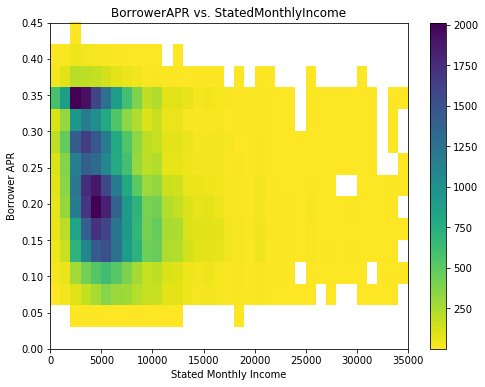

In [151]:
s=[8, 6]
plt.figure(figsize =s ) 
r=0
enx=new_df.StatedMonthlyIncome.max()
eny=new_df.BorrowerAPR.max()
q=1000
p=0.03
bx = np.arange(r,enx+q, q)
by = np.arange(r, eny+p, p)
ux='StatedMonthlyIncome'
uy='BorrowerAPR'
b=[bx, by]
e= 0.5
plt.hist2d(data = new_df, x =ux , y =uy , bins =b ,cmap = 'viridis_r', cmin =e)
plt.colorbar()
tt='BorrowerAPR vs. StatedMonthlyIncome'
plt.title(tt)
yt='Borrower APR'
plt.ylabel(yt)
xt='Stated Monthly Income'
plt.xlabel(xt);

### Observations:
From the figure above, it is clearly seen that there is negative linear relationship between Borrower APR and Stated monthly income.

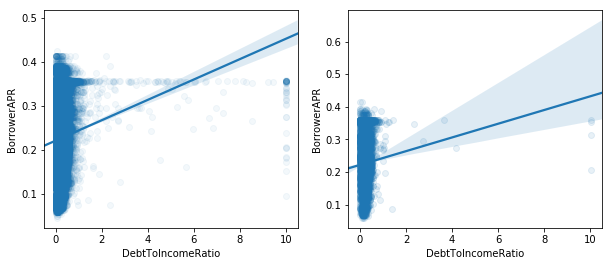

In [152]:
### Borrower APR with Debt to Income Ratio
r=[10, 4]
plt.figure(figsize = r) 

plt.subplot(1, 2, 1)
k={'alpha' : 1/20}
ux='DebtToIncomeRatio'
uy='BorrowerAPR'
sn.regplot(data = new_df, x =ux , y = uy, scatter_kws = k);

plt.subplot(1, 2, 2)
k1={'alpha' : 1/10}
sn.regplot(data = new_df.sample(4500), x = ux, y = uy, scatter_kws = k1);


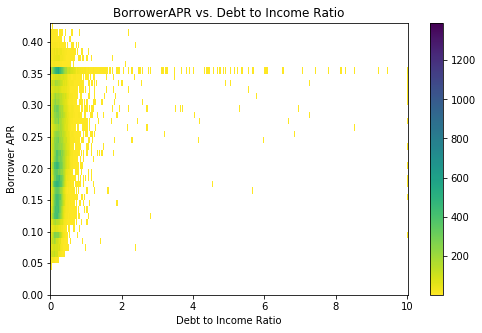

In [153]:
s=[8, 5]
plt.figure(figsize = s) 
r=0
rx=0.03
ry=0.01
enx=new_df.DebtToIncomeRatio.max()
eny=new_df.BorrowerAPR.max()
bx = np.arange(0,enx +rx, rx)
by = np.arange(0, eny+ry, ry)
b=[bx, by]
cm=0.5
ux='DebtToIncomeRatio'
uy='BorrowerAPR'
plt.hist2d(data = new_df, x = ux, y = uy, bins =b ,cmap = 'viridis_r', cmin = cm)
plt.colorbar();
tt='BorrowerAPR vs. Debt to Income Ratio'
plt.title(tt)
ty='Borrower APR'
plt.ylabel(ty)
tx='Debt to Income Ratio'
plt.xlabel(tx);

Debt to income ration is having the same issue as state monthly income, so we limit it to less than 1 and graph the above figure again

In [154]:
cd=new_df.DebtToIncomeRatio
new_df = new_df[ cd< 1]

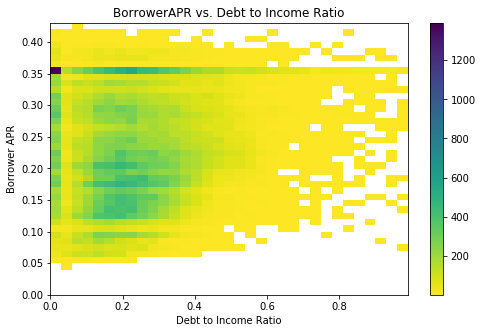

In [155]:
s=[8, 5]
plt.figure(figsize = s) 
r=0
rx=0.03
ry=0.01
enx=new_df.DebtToIncomeRatio.max()
eny=new_df.BorrowerAPR.max()
bx = np.arange(0,enx +rx, rx)
by = np.arange(0, eny+ry, ry)
b=[bx, by]
cm=0.5
ux='DebtToIncomeRatio'
uy='BorrowerAPR'
plt.hist2d(data = new_df, x = ux, y = uy, bins =b ,cmap = 'viridis_r', cmin = cm)
plt.colorbar();
tt='BorrowerAPR vs. Debt to Income Ratio'
plt.title(tt)
ty='Borrower APR'
plt.ylabel(ty)
tx='Debt to Income Ratio'
plt.xlabel(tx);

### Observation:
It can be seen from the heat map and scatterplot that there is a weak positive correlation between Borrower APR and Debt to income ratio 

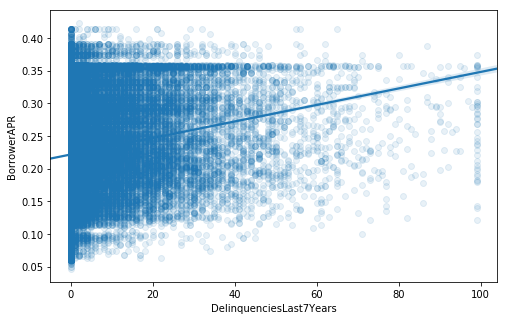

In [156]:
#Borrower APR with Delinquencies in Last 7 Years
s=[8, 5]
plt.figure(figsize = s) 
ux='DelinquenciesLast7Years'
uy='BorrowerAPR'
k= {'alpha' : 1/10}
sn.regplot(data =new_df, x =ux , y = uy, scatter_kws =k);


### Observation:
From the figure above, the correlation between Delinquencies in Last 7 Years and Borrower APR is weakily positive correlated.

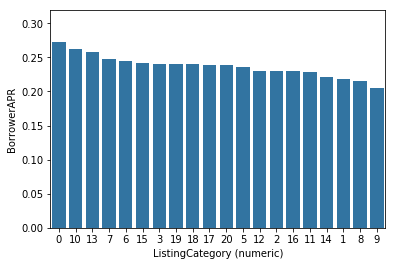

In [172]:
#Borrower APR with Listing Category Numeric
c1=new_df.groupby(['ListingCategory (numeric)'])['BorrowerAPR'] 
c2=c1.mean().reset_index()
ux='ListingCategory (numeric)'
uy='BorrowerAPR'
c3=c2.sort_values(by=u, ascending=False)
sn.barplot(data =new_df, x = ux , y = uy,color = bc, errwidth =0, order = c3[ux]);

### Observations:
From the figure, those who pay the most loans are those in category 0(unknown), followeb by 10(cosmetic procedure) and so on.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

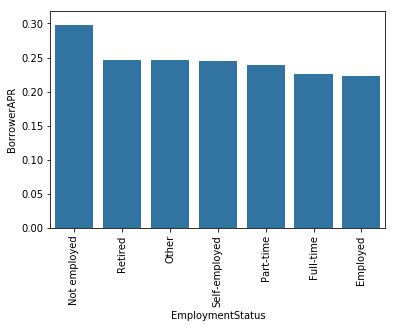

In [174]:
#Borrower APR with Employment Status

c1=new_df.groupby(['EmploymentStatus'])['BorrowerAPR'] 
c2=c1.mean().reset_index()
ux='EmploymentStatus'
uy='BorrowerAPR'
c3=c2.sort_values(by=u, ascending=False)
sn.barplot(data =new_df, x = ux , y = uy,color = bc, errwidth =0, order = c3[ux]);
rot=90
plt.xticks(rotation=rot)

### Observation:
From the dataset and figure above, it is shown that unemployed borrowers have the highest Borrower APR and this is accurate with employed with the lowest.

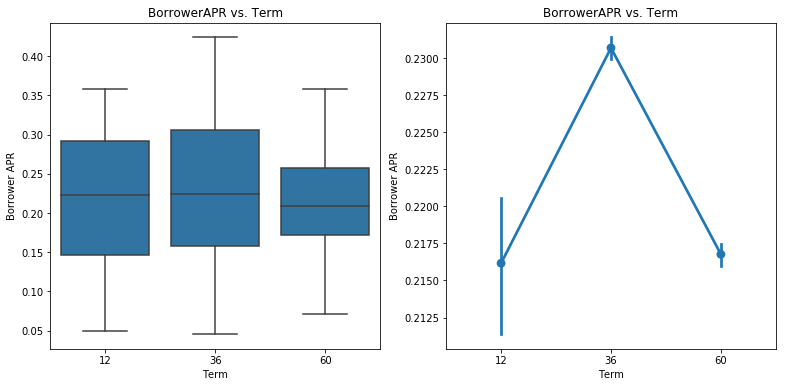

In [157]:
#Borrower APR with Term
s= [13, 6]
plt.figure(figsize =s) 

plt.subplot(1, 2, 1)
ux='Term'
uy=uy
sn.boxplot(data = new_df, x =ux , y = uy, color = bc);
tt='BorrowerAPR vs. Term'
plt.title(tt)
yt='Borrower APR'
plt.ylabel(yt)
xt='Term'
plt.xlabel(xt);

plt.subplot(1, 2, 2)
sn.pointplot(data = new_df, x = ux, y = uy);
plt.title(tt)
plt.ylabel(yt)
plt.xlabel(xt);

### Observaton:
The figure shows that people borrow loans for large terms.

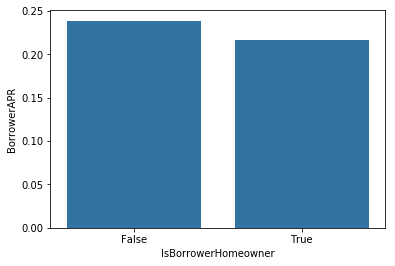

In [176]:
#Borrower APR with Is Borrower Homeowner
ux='IsBorrowerHomeowner'
uy='BorrowerAPR'
r=0
sn.barplot(data = new_df, x =ux , y =uy , color =bc, errwidth = r);



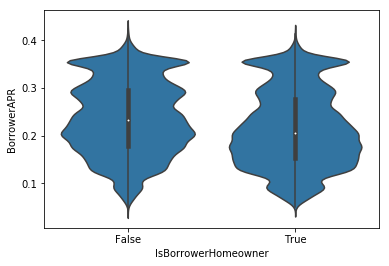

In [177]:
sn.violinplot(data = new_df, x = ux, y =uy, color = bc);

### Observation:
From the figure above , people who are not home owners have high borrower APR than people who have homes.

### Prosper Score with other variables

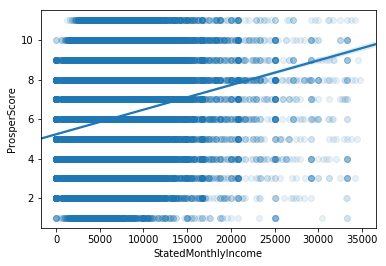

In [178]:
#Prosper score with State Monthly incomes
c='StatedMonthlyIncome'
t='ProsperScore'
k={'alpha' : 1/10}
sn.regplot(data = new_df, x =c, y =t , scatter_kws = k);

### Observations:
As seen from the scatter plot above, Prosper Score and state monthly income are weakly positive correlated.

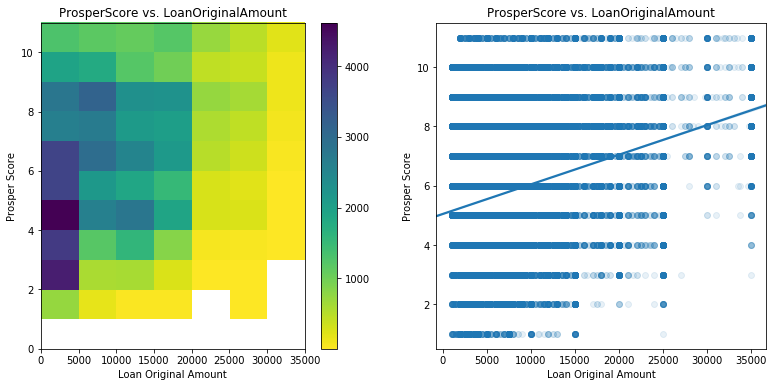

In [180]:
#Prosper Score & Loan Original Amount
s=[13, 6]
plt.figure(figsize = s);

plt.subplot(1, 2, 1)
enx=new_df.LoanOriginalAmount.max()
eny=new_df.ProsperScore.max()
rx=5000
ry=1
bx = np.arange(0, enx+rx, rx)
by = np.arange(0, eny+ry, ry)
ux='LoanOriginalAmount'
uy= 'ProsperScore'
b=[bx, by]
pt=0.5
plt.hist2d(data = new_df, x =ux , y =uy, bins =b , cmap = 'viridis_r', cmin = pt)
plt.colorbar();
tt='ProsperScore vs. LoanOriginalAmount'
plt.title(tt)
yt='Prosper Score'
plt.ylabel(yt)
xt='Loan Original Amount'
plt.xlabel(xt);



plt.subplot(1, 2, 2)
k={'alpha' : 1/10}
sn.regplot(data =new_df, x = ux, y = uy, scatter_kws =k );
plt.title(tt)
plt.ylabel(yt)
plt.xlabel(xt);


### Observations:
As seen from the scatter plot and heatmap above, Prosper Score and loan original amount are weakly positive correlated.

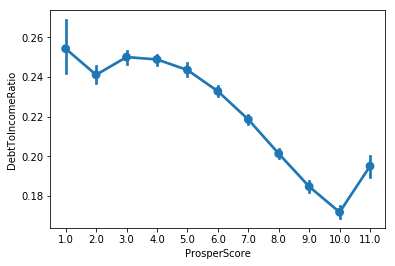

In [183]:
#Prosper Score with Debt To Income Ratio
uy='ProsperScore'
ux='DebtToIncomeRatio'
sn.pointplot(data = new_df, x =uy , y =ux );


### 0bservations:
From the graph above it can be seen that as Prosper score increases, the debt to income ratio decreases.

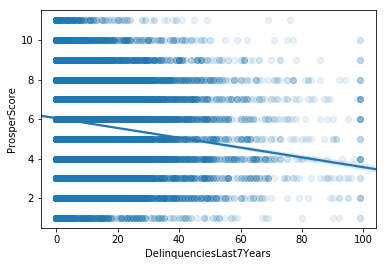

In [184]:
#Prosper score with Delinquencies in Last 7 Years
c='DelinquenciesLast7Years'
t='ProsperScore'
k={'alpha' : 1/10}
sn.regplot(data = new_df, x =c, y =t , scatter_kws = k);

### Observation:
There is a week negative correlation between Prosper score and Delinquencies in Last 7 Years

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

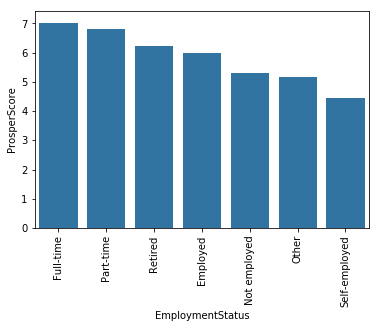

In [187]:
#Prosper score with Employment Status
ux='EmploymentStatus'
uy='ProsperScore'
c1=new_df.groupby([ux])[uy] 
c2=c1.mean().reset_index()
c3=c2.sort_values(by=uy, ascending=False)
sn.barplot(data =new_df, x = ux , y = uy,color = bc, errwidth =0, order = c3[ux]);
rot=90
plt.xticks(rotation=rot)

### Observations:
It can be seen that full time workers has the highest prosper score which makes sense.

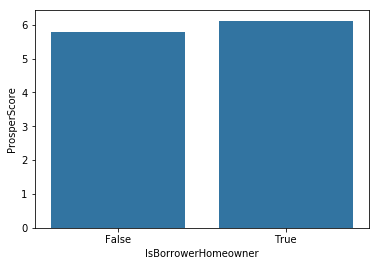

In [190]:
#Prosper score with Is Borrower Homeowner
ux='IsBorrowerHomeowner'
uy='ProsperScore'
r=0
sn.barplot(data = new_df, x =ux , y =uy , color =bc, errwidth = r);

### Observations:
It can be seen that home owners has the highest prosper score which makes sense.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

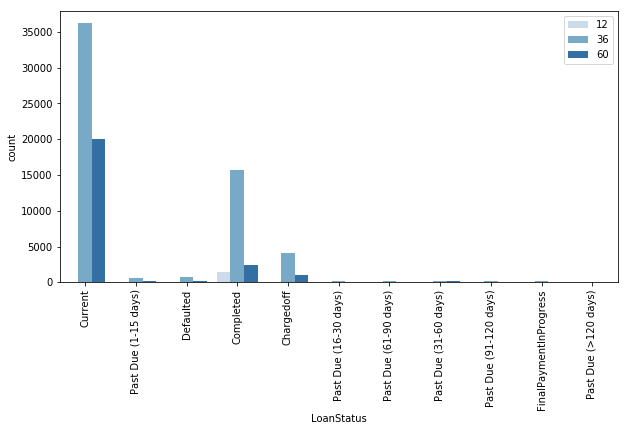

In [214]:
#loan status and Employment Status
s=[10, 5]
plt.figure(figsize = [10, 5])
ux='LoanStatus'
uy= 'Term'
p='Blues'
sn.countplot(data =new_df, x =ux , hue =uy, palette=p);
t=1
plt.legend(loc = 1);
rot=90
plt.xticks(rotation=rot)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

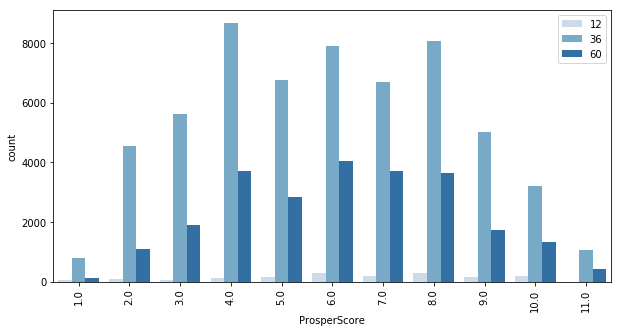

In [215]:
s=[10, 5]
plt.figure(figsize = s)
ux='ProsperScore'
uy= 'Term'
p='Blues'
sn.countplot(data = new_df, x = ux, hue = uy, palette=p);
rot=90
plt.legend(loc = 1);
plt.xticks(rotation=rot)

### Loan Original Amount

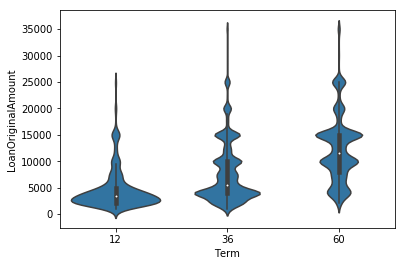

In [192]:
#Loan Original Amount with Term
ux='Term'
uy='LoanOriginalAmount'
sn.violinplot(data =new_df, x =ux , y = uy, color = bc);

### Observations:
From the figure above it shows that the mean of loan original amount increase as the term in months increases.

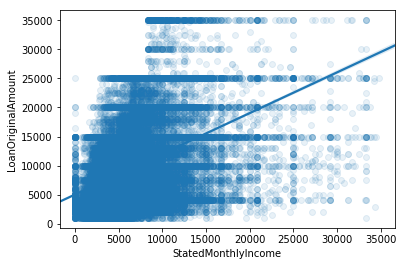

In [193]:
#Loan Original Amount with statedmonthyincome
c='StatedMonthlyIncome'
t='LoanOriginalAmount'
k={'alpha' : 1/10}
sn.regplot(data = new_df, x =c, y =t , scatter_kws = k);

### Observations:

This shows a positive correlation betwen Loan Original Amount and State Monthly  Income.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 From the investigations above:
 
1. It was observed that there is a strong negative correlation between Prosper Score and Borrower APR.  
2. There is a negative relationship between Borrower APR and Stated monthly income
3. The term 36 month had the highest  Borrower APR averagely.
4. There is a positive relationship between Borrower APR and Debt to Income Ratio but is a weak one.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. there is weakly positive relationship between Prosper score and  Stated Monthly Income.
2. Prosper Score and delinquencies in last 7 years have a weakly negative correlation.
3. Prosper Score and Debt to Income ratio have a negative relationship between them.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further.

###   Term vs  Borrower APR and Prosper Score

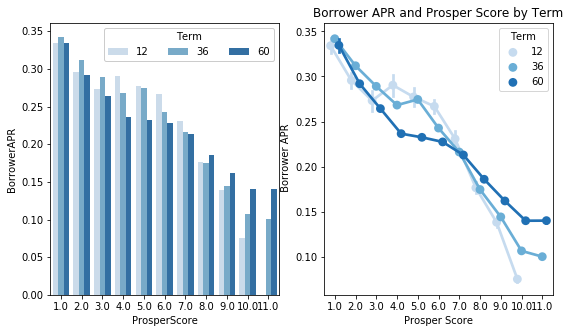

In [220]:
s=[9, 5]
plt.figure(figsize = s)
plt.subplot(1,2,1)
ux='ProsperScore'
uy='BorrowerAPR'
uz='Term'
p='Blues'
r=0
lx = sn.barplot(data = new_df, x =ux , y =uy , hue = uz,  palette=p, errwidth =r);
t=1
c=3
fa=1
lx.legend(loc = t, ncol = c, framealpha = 1, title = uz)

plt.subplot(1,2,2)
b='Blues'
d=0.4
nx = sn.pointplot(data = new_df, x = ux, y = uy, hue = uz,palette =b , dodge = d)
tt='Borrower APR and Prosper Score by Term'
plt.title(tt)
xt='Prosper Score'
plt.xlabel(xt)
yt=' Borrower APR'
plt.ylabel(yt);


### Observation:
It can be seen that the borrowers with a prosper score of 7 for 12 months pay lesser than the other two ters(36 and 60 months)

###   IsHomeowners vs  Borrower APR and Prosper Score

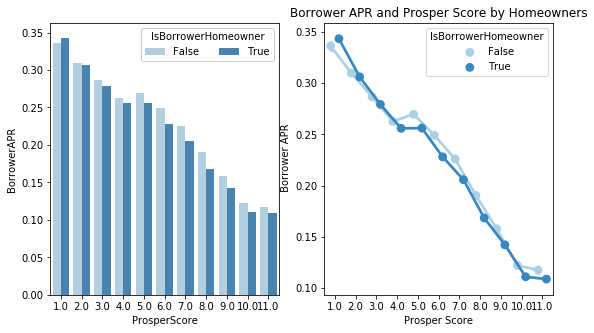

In [221]:
s=[9, 5]
plt.figure(figsize = s)
plt.subplot(1,2,1)
ux='ProsperScore'
uy='BorrowerAPR'
uz='IsBorrowerHomeowner'
p='Blues'
r=0
lx = sn.barplot(data = new_df, x =ux , y =uy , hue = uz,  palette=p, errwidth =r);
t=1
c=3
fa=1
lx.legend(loc = t, ncol = c, framealpha = 1, title = uz)

plt.subplot(1,2,2)
b='Blues'
d=0.4
nx = sn.pointplot(data = new_df, x = ux, y = uy, hue = uz,palette =b , dodge = d)
tt='Borrower APR and Prosper Score by Homeowners'
plt.title(tt)
xt='Prosper Score'
plt.xlabel(xt)
yt=' Borrower APR'
plt.ylabel(yt);


### Observation:
From the figure, I realized that homeowners have lower Borrower APR than non homeowners as the prosper score is above 1.

###   Homeownership vs Loan Amount and Prosper score

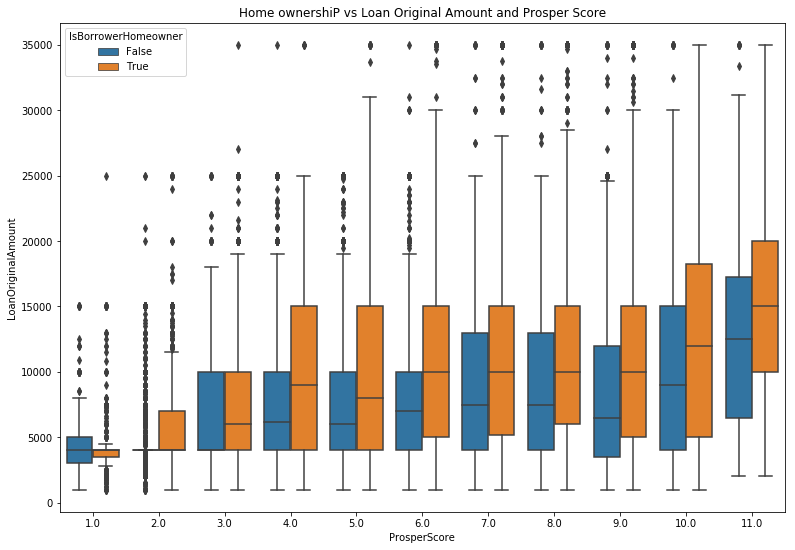

In [224]:
s=[13, 9]
plt.figure(figsize = s)
ux='ProsperScore'
uy='LoanOriginalAmount'
uz='IsBorrowerHomeowner'
sn.boxplot(data=new_df, x=ux, y=uy, hue=uz);
tt='Home ownershiP vs Loan Original Amount and Prosper Score'
plt.title(tt)
plt.ylabel(uy)
plt.xlabel(ux);

###  Observation:
Home owners take larger loans as their prosper scores increases than non home owners.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From my investigations:

1. I realized that homeowners have lower Borrower APR than non homeowners as the prosper score is above 1.

2. Also I realized homeowners receive large amounts of loans than non home owners.
3. It could be seen that the borrowers with a prosper score of 7 for 12 months pay lesser than the other two ters(36 and 60 months)


### Were there any interesting or surprising interactions between features?

From the figures above:

1. I found out that there were more features that affect Prosper score and ratings than i originally assumed.